### Importing Data Set and Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data1 = pd.read_csv("train.csv", usecols=["Customer ID", "Income (USD)", "Age", "Loan Amount Request (USD)", "Loan Sanction Amount (USD)", "Credit Score", "Co-Applicant", "No. of Defaults", "Current Loan Expenses (USD)","Property Price"])


In [3]:
data1.columns

Index(['Customer ID', 'Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Credit Score', 'No. of Defaults',
       'Co-Applicant', 'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [4]:
data1.dropna(subset = ['Loan Sanction Amount (USD)'],inplace = True)

In [5]:
data1.isnull().sum()

Customer ID                       0
Age                               0
Income (USD)                   4493
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     167
Credit Score                   1670
No. of Defaults                   0
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)        0
dtype: int64

# Regression Imputation for Missing Values

## 1. Identify Missing Values
Inspect the dataset to identify columns with missing values. For the given dataset, the following columns contain missing values:
- **Income (USD)**: 4493 missing values
- **Current Loan Expenses (USD)**: 167 missing values
- **Credit Score**: 1670 missing values

## 2. Handle Missing Values
For numerical variables:
- Utilize appropriate statistical measures to impute missing values.
- Considering the substantial number of missing values, advanced techniques such as regression imputation may be warranted for **Income (USD)** and **Credit Score**.
-  Given the lower number of missing values for **Current Loan Expenses (USD)**, consider imputing missing values using simpler methods like mean or median

## 3. Perform Regression Imputation
- Identify correlated variables for **Income (USD)** and **Credit Score**.
- Segment the dataset into complete and incomplete subsets for each variable.
- Train regression models using complete data, treating the missing variable as the target and correlated predictors as features.
- Employ trained models to predict missing values for the incomplete dataset.
- Replace missing values with predictions obtained from the regression models.

## Conclusion
Given the presence of missing values, especially in **Income (USD)** and **Credit Score**, applying regression imputation can enhance data completeness and potentially improve the robustness of subsequent analyses.



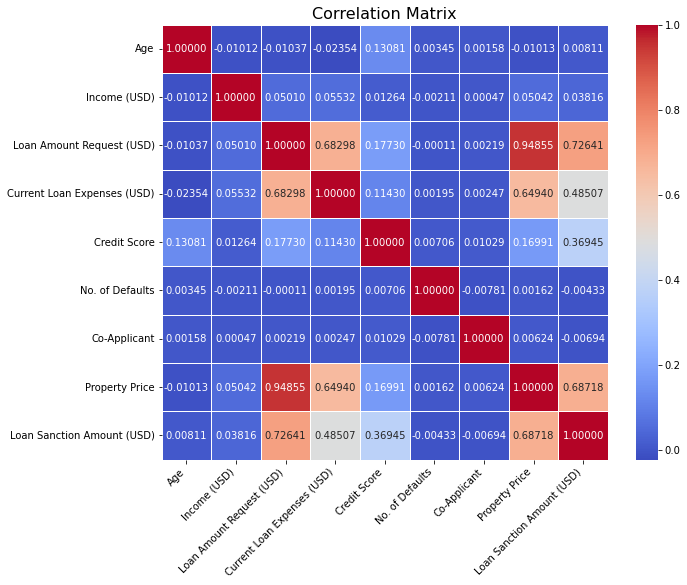

In [6]:
correlation_matrix=data1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".5f", linewidths=.9)
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.show()

In [7]:
import pandas as pd
mean_current_loan_expenses = data1['Current Loan Expenses (USD)'].mean()
data1['Current Loan Expenses (USD)'].fillna(mean_current_loan_expenses, inplace=True)


In [8]:
data1.isnull().sum()

Customer ID                       0
Age                               0
Income (USD)                   4493
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Credit Score                   1670
No. of Defaults                   0
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)        0
dtype: int64

In [9]:
data = data1[["Loan Amount Request (USD)", "Current Loan Expenses (USD)", "Income (USD)","Loan Sanction Amount (USD)"]]
complete_data = data.dropna(subset=["Income (USD)"])
missing_data = data[data["Income (USD)"].isnull()]
X_train = complete_data.drop(columns=["Income (USD)"])
y_train = complete_data["Income (USD)"]
X_test = missing_data.drop(columns=["Income (USD)"])
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict missing values
predicted_values = regression_model.predict(X_test)

# Impute missing values in the original dataset
data.loc[data["Income (USD)"].isnull(),"Income (USD)"] = predicted_values

C:\Users\tshep\AppData\Local\Temp\ipykernel_19336\2362531856.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data["Income (USD)"].isnull(),"Income (USD)"] = predicted_values


In [10]:
data.isnull().sum()

Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Income (USD)                   0
Loan Sanction Amount (USD)     0
dtype: int64

In [11]:
# Add intercept to X_train
X_train_with_intercept = sm.add_constant(X_train)

# Fit OLS model
model = sm.OLS(y_train, X_train_with_intercept).fit()

# Display model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Income (USD)   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     28.29
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           2.98e-18
Time:                        16:29:46   Log-Likelihood:            -2.7058e+05
No. Observations:               25167   AIC:                         5.412e+05
Df Residuals:                   25163   BIC:                         5.412e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [12]:
data.insert(3, 'Credit Score', data1['Credit Score'])
data.insert(4, 'Age', data1['Age'])
data.insert(5, 'Property Price', data1['Property Price'])


In [13]:
data.isnull().sum()

Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Income (USD)                      0
Credit Score                   1670
Age                               0
Property Price                    0
Loan Sanction Amount (USD)        0
dtype: int64

In [14]:
complete_data = data.dropna(subset=['Credit Score'])
missing_data = data[data['Credit Score'].isnull()]
X_train = complete_data.drop(columns=['Credit Score'])
y_train = complete_data['Credit Score']
X_test = missing_data.drop(columns=['Credit Score'])
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict missing values
predicted_values = regression_model.predict(X_test)

# Impute missing values in the original dataset
data.loc[data['Credit Score'].isnull(),'Credit Score'] = predicted_values

In [15]:
# Add intercept to X_train
X_train_with_intercept = sm.add_constant(X_train)

# Fit OLS model
model = sm.OLS(y_train, X_train_with_intercept).fit()

# Display model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Credit Score   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     942.9
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:29:59   Log-Likelihood:            -1.5690e+05
No. Observations:               27990   AIC:                         3.138e+05
Df Residuals:                   27983   BIC:                         3.139e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [16]:
data.insert(0,'Customer ID',data1['Customer ID'])

In [17]:
data.isnull().sum()

Customer ID                    0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Income (USD)                   0
Credit Score                   0
Age                            0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [18]:
data = data.drop('Income (USD)', axis=1)

In [19]:
data.isnull().sum()

Customer ID                    0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Credit Score                   0
Age                            0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [20]:
X = data.drop(['Customer ID','Loan Sanction Amount (USD)'],axis = 1)
Y = data['Loan Sanction Amount (USD)']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Fit the linear regression model
model = LinearRegression().fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# Display intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -126589.7948049836
Coefficients: [ 5.93081901e-01 -4.65686568e+00  1.72592967e+02 -5.89567721e+01
 -1.46931608e-02]


In [22]:
import statsmodels.api as sm
X_train_with_intercept = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train_with_intercept).fit()
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Loan Sanction Amount (USD)   R-squared:                       0.597
Model:                                    OLS   Adj. R-squared:                  0.596
Method:                         Least Squares   F-statistic:                     7014.
Date:                        Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                                16:30:18   Log-Likelihood:            -2.7884e+05
No. Observations:                       23728   AIC:                         5.577e+05
Df Residuals:                           23722   BIC:                         5.577e+05
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 21439.175609440725
Mean Squared Error (MSE): 1004726560.633627
Root Mean Squared Error (RMSE): 31697.421987184178
R-squared (R2): 0.5573452181548059


# Model Diagnostic Procedure

## Overview
This document outlines the diagnostic steps conducted to assess the performance and reliability of our predictive model.

## Model Information
Provide a brief summary of the predictive model, including features used, target variable, and the modeling algorithm employed.

## Diagnostic Steps
1. **Residual Analysis:**
   - Examine residuals to ensure that the model assumptions are met. This includes checking for homoscedasticity, normality, and independence of residuals.

2. **Feature Importance:**
   - Assess the importance of each feature in the model. Identify key predictors that contribute significantly to the model's predictive power.

3. **Model Evaluation Metrics:**
   - Calculate and analyze key model evaluation metrics, such as accuracy, precision, recall, and F1 score. Compare these metrics against established benchmarks or business requirements.

4. **Cross-Validation:**
   - Perform cross-validation to assess the model's stability and generalization performance. Evaluate consistency across different subsets of the data.



## Documentation and Reporting
Detailed documentation of the diagnostic checks, including results, interpretations, and any recommendations, will be maintained. This documentation serves as a reference for ongoing model monitoring and improvement.

## Conclusion
This formal explanation aims to provide transparency regarding the diagnostic steps undertaken for our predictive model



In [92]:
from sklearn.metrics import r2_score
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)
model = sm.OLS(Y_train, X_train_with_intercept).fit()
Y_pred = model.predict(X_test_with_intercept)
r2 = r2_score(Y_test,Y_pred)
rounded_r2 = round(r2, 5)
print("R-squared:", rounded_r2)

R-squared: 0.53683


In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming Y_true and Y_pred are your true and predicted values
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)  # Pass squared=False to get RMSE
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 22964.50268989745
Mean Squared Error (MSE): 1045990143.4824276
Root Mean Squared Error (RMSE): 32341.77087734108
R-squared (R2): 0.536831706399662


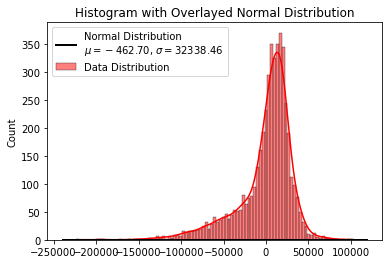

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
residuals = Y_test - Y_pred
sns.histplot(residuals, bins='auto', kde=True, color='red', label='Data Distribution')

mu, sigma = np.mean(residuals), np.std(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label=f'Normal Distribution\n$\mu={mu:.2f}$, $\sigma={sigma:.2f}$')

plt.legend()
plt.title('Histogram with Overlayed Normal Distribution')
plt.show()

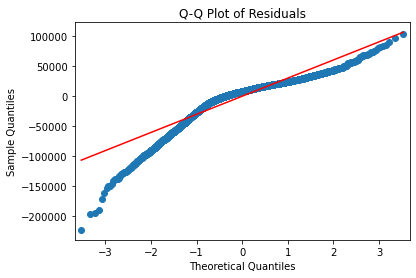

In [95]:
import statsmodels.api as sm
sm.qqplot(residuals, line='r')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [96]:
from statsmodels.stats.diagnostic import lilliefors

stat, p_value = lilliefors(residuals)
print("Lilliefors Test Statistic:", stat)
print("P-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The residuals is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The residuals appears to be normally distributed.")

Lilliefors Test Statistic: 0.1519684708231156
P-value: 0.0009999999999998899
Reject the null hypothesis: The residuals is not normally distributed.


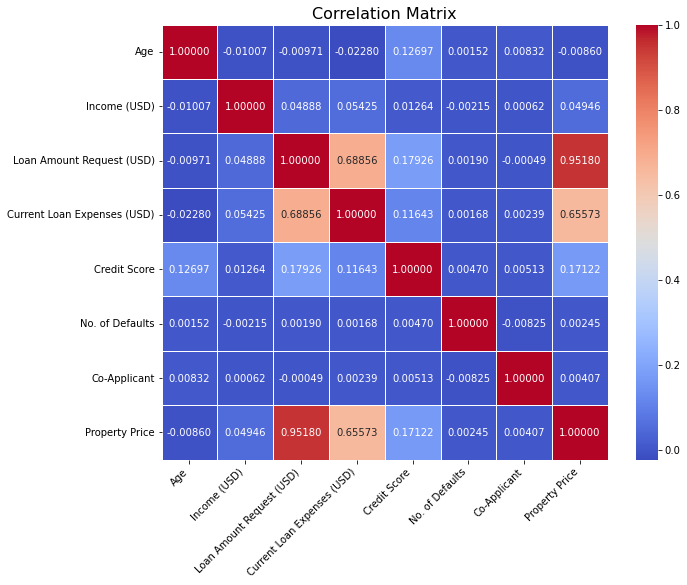

In [97]:
correlation_matrix=X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".5f", linewidths=.9)
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.show()